# Double Spring Experiment Using Lagrangian Mechanics

This system consists of two masses `m1` and `m2`, each attached to two springs with spring constants `k1` and `k2`. Both masses are restricted to move in one dimension (along the x-axis), and the second spring connects the two masses.

### Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Assign Constants

Mass is given in kilograms and length is given meters. The gravitational constant remains `9.8` meters per second squared

In [12]:
m1 = 1.0  # mass of the first object (kg)
m2 = 2.0  # mass of the second object (kg)
k1 = 5.0  # spring constant for the first spring (N/m)
k2 = 10.0  # spring constant for the second spring (N/m)

# Initial conditions: [x1, v1, x2, v2]
initial_conditions = [0.1, 0, 0.2, 0]  # Small displacement from equilibrium, both masses

### Define Functions

Function returns infinitesimals of change in distance with time

In [13]:
# Equations of motion for the double spring-mass system
def equations(t, y):
    x1, v1, x2, v2 = y

    # Equations of motion derived from the Euler-Lagrange equation
    dx1_dt = v1
    dx2_dt = v2
    
    dv1_dt = (-k1 * x1 + k2 * (x2 - x1)) / m1
    dv2_dt = (-k2 * (x2 - x1)) / m2

    return [dx1_dt, dv1_dt, dx2_dt, dv2_dt]

In [14]:
# Time points to solve for
t_span = (0, 20)  # Simulate for 20 seconds
t_eval = np.linspace(0, 20, 1000)  # Evaluate at 1000 points for smooth results

# Solve the system of ODEs using Runge-Kutta method (via scipy's solve_ivp)
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval)

# Extract results
x1_sol = solution.y[0]
x2_sol = solution.y[2]

### Plotting the Results

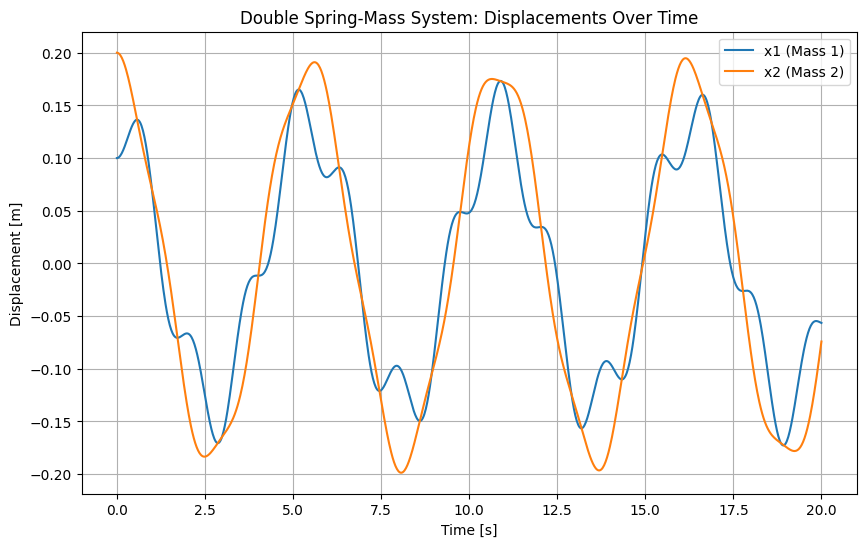

In [15]:
# Plotting the displacements of both masses
plt.figure(figsize=(10, 6))
plt.plot(t_eval, x1_sol, label="x1 (Mass 1)")
plt.plot(t_eval, x2_sol, label="x2 (Mass 2)")
plt.title('Double Spring-Mass System: Displacements Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid()
plt.show()

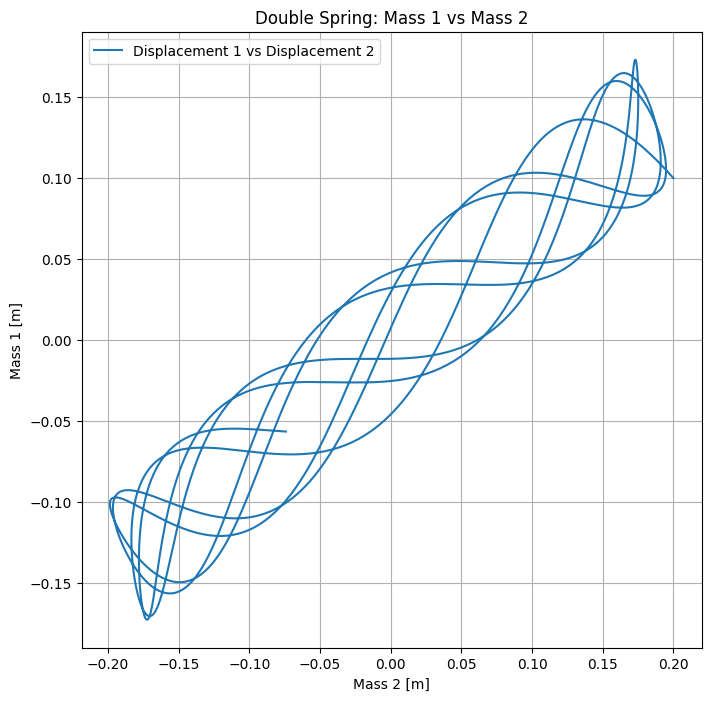

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(x2_sol, x1_sol, label="Displacement 1 vs Displacement 2")
plt.title('Double Spring: Mass 1 vs Mass 2')
plt.xlabel('Mass 2 [m]')
plt.ylabel('Mass 1 [m]')
plt.legend()
plt.grid()
plt.show()